In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [3]:
order_items = pd.read_csv('olist_order_items_dataset.csv')

In [4]:
orders = pd.read_csv('olist_orders_dataset.csv')

#### Данные таблицы с уникальными id пользователей

*customer_id* — позаказный идентификатор пользователя\
*customer_unique_id* —  уникальный идентификатор пользователя  (аналог номера паспорта)\
*customer_zip_code_prefix* —  почтовый индекс пользователя\
*customer_city* —  город доставки пользователя\
*customer_state* —  штат доставки пользователя

In [5]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### Данные с товарными позициями, которые входят в заказ

*order_id* —  уникальный идентификатор заказа (номер чека)\
*order_item_id* —  идентификатор товара внутри одного заказа\
*product_id* —  ид товара (аналог штрихкода)\
*seller_id* — ид производителя товара\
*shipping_limit_date* —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике\
*price* —  цена за единицу товара\
*freight_value* —  вес товара

In [6]:
order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Данные с таблицей заказов

*order_id* —  уникальный идентификатор заказа (номер чека)\
*customer_id* —  позаказный идентификатор пользователя\
*order_status* —  статус заказа\
*order_purchase_timestamp* —  время создания заказа\
*order_approved_at* —  время подтверждения оплаты заказа\
*order_delivered_carrier_date* —  время передачи заказа в логистическую службу\
*order_delivered_customer_date* —  время доставки заказа\
*order_estimated_delivery_date* —  обещанная дата доставки

In [7]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Статус заказа:

*created* —  создан\
*approved* —  подтверждён\
*invoiced* —  выставлен счёт\
*processing* —  в процессе сборки заказа\
*shipped* —  отгружен со склада\
*delivered* —  доставлен пользователю\
*unavailable* —  недоступен\
*canceled* —  отменён

#### 1. Определим сколько у нас пользователей, которые совершили покупку только один раз?

Исходя из данных, customer_id - это у нас показной id (идентификатор не уникальный, так как пользователь может посещать сайт 
и делать заказы с разных браузеров).

Так как наш датасет заказов хранит только текущий статус заказа (истории этапа заказов нет) считать критерий
указывающий на точное совершение покупки клиентом без дополнительных вопросов трудно. Поэтому в нашем проекте будем считать, 
что если клиент оплатил заказ и статус заказа отгружен со склада т.е. order_approved_at не "Nan" и order_status = "shipped",
значит покупка совершена.(заказ может быть оплачен, но в последствии до отгрузки со склада отменен или товара не окажется 
на складе).

Представим, что покупать товары могут только зарегистрированные пользователи с уникальным id. 
Первым шагом отфильтруем данные и к датасету заказов добавим уникальные id пользователей (customer_unique_id) объединив
датафреймы.

In [8]:
merge_orders_customers = orders.query('order_status == "shipped" and order_approved_at.notna()') \
    .merge(customers[['customer_id', 'customer_unique_id']], on = 'customer_id')

In [9]:
# Полученный датафрейм сгруппируем по customer_unique_id(id клиента), найдем количество заказов и с помощью 
# value_counts() увидим какое количество клиентов сделало 1 и более заказов.
number_of_purchases = merge_orders_customers \
    .groupby('customer_unique_id', as_index = False) \
    .agg({'order_id': 'count'}) \
    .order_id \
    .value_counts()

In [10]:
number_of_purchases

1    1093
2       7
Name: order_id, dtype: int64

**1093** пользователя совершили покупку хотя бы 1 раз

In [11]:
# Если же мы возьмем за покупку, как совершение оплаты товара, тогда можно рассчитать следующим образом:
number_of_purchases_two = orders.query('order_approved_at.notna()') \
    .merge(customers[['customer_id', 'customer_unique_id']], on = 'customer_id') \
    .groupby('customer_unique_id', as_index = False) \
    .agg({'order_id': 'count'}) \
    .order_id \
    .value_counts()

In [12]:
number_of_purchases_two

1     93049
2      2708
3       191
4        30
5         8
6         6
7         3
9         1
17        1
Name: order_id, dtype: int64

**93049** пользователя совершили 1 покупку.

#### 2. Найдем сколько заказов в месяц в среднем не доставляется по разным причинам (выведем детализацию по причинам).

In [13]:
# Изменили тип данных для нескольких столбцов, для простоты дальнейшего расчета.

orders[['order_purchase_timestamp', 
                         'order_approved_at', 
                         'order_delivered_carrier_date', 
                         'order_delivered_customer_date',
                         'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', 
                         'order_approved_at', 
                         'order_delivered_carrier_date', 
                         'order_delivered_customer_date',
                         'order_estimated_delivery_date']].apply(pd.to_datetime)

In [14]:
# Для анализа предстваим, что нам нужны данные со статусом заказа "canceled"(отменен).

orders_canceled = orders \
    .query('order_status == "canceled"') \
    [['order_purchase_timestamp', 
                         'order_approved_at', 
                         'order_delivered_carrier_date', 
                         'order_delivered_customer_date',
                         'order_estimated_delivery_date']]

После создания запроса мы видим, что заказы отменяются на разных этапах:
- Заказ был создан, но не оплачен.
- Заказ был создан и оплачен, но не доставлен в логистическую службу.
- Заказ был создан, оплачен, доставлен в логистическую службу, но не доставлен.

In [15]:
orders_canceled.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17


In [16]:
# Чтобы сгруппировать данные, вытащим из даты создания заявки месяц (создадим столбец)

orders_canceled['month'] = orders_canceled['order_purchase_timestamp'].dt.month

In [17]:
# Сгруппируем по месяцу, отобразим интересующие нас этапы, посчитаем сумму Nan-значений каждого месяца и выведем
# среднее по месяцу. Взяли данные за весь период.

orders_canceled.groupby('month')['order_approved_at',
                                           'order_delivered_carrier_date',
                                           'order_delivered_customer_date'].apply(lambda x: x.isna().sum()).mean().round(2)

C:\Users\uszai\AppData\Local\Temp\ipykernel_11892\2949057146.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  orders_canceled.groupby('month')['order_approved_at',


order_approved_at                11.75
order_delivered_carrier_date     45.83
order_delivered_customer_date    51.58
dtype: float64

In [18]:
# Детализация по годам и месяцам. Количество отмены заказов по месяцам и по каким причинам. 
orders_canceled['year'] = orders_canceled['order_purchase_timestamp'].dt.year
orders_canceled.groupby(['year', 'month'])['order_approved_at',
                                           'order_delivered_carrier_date',
                                           'order_delivered_customer_date'].apply(lambda x: x.isna().sum())

C:\Users\uszai\AppData\Local\Temp\ipykernel_11892\2788362213.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  orders_canceled.groupby(['year', 'month'])['order_approved_at',


order_approved_at  order_delivered_carrier_date  \
year month                                                    
2016 9                      0                             2   
     10                     6                            19   
2017 1                      1                             3   
     2                      2                            17   
     3                      2                            33   
     4                      4                            18   
     5                      9                            29   
     6                      4                            16   
     7                      5                            28   
     8                      6                            27   
     9                      4                            20   
     10                     5                            26   
     11                     7                            37   
     12                     5                            10   
2018 1                      1                             8   
     2                      3                            32   
     3                      3                            24   
     4                      0                            15   
     5                      1                            24   
     6                      0                            18   
     7                      1                            41   
     8                     53                            84   
     9                     15                            15   
     10                     4                             4   

            order_delivered_customer_date  
year month                                 
2016 9                                  2  
     10                                19  
2017 1                                  3  
     2                                 17  
     3                                 33  
     4                                 18  
     5                                 29  
     6                                 16  
     7                                 28  
     8                                 27  
     9                                 20  
     10                                26  
     11                                37  
     12                                11  
2018 1                                 34  
     2                                 72  
     3                                 26  
     4                                 15  
     5                                 24  
     6                                 18  
     7                                 41  
     8                                 84  
     9                                 15  
     10                                 4

**Вывод**\
Заказы были отменены и не доставлены покупателю на этапах:
- Создан, но не оплачен в среднем - 11.75 раз
- Создан и оплачен, но не доставлен в логистическую службу - 45.83
- Создан, оплачен, доставлен в логистическую службу, но не доставлен - 51.58

#### 3. По каждому товару определим, в какой день недели товар чаще всего покупается.

Можем предроложить, что данное задание нам потребовалось для выявления факта покупки(оплаты заказа), а не получения.

Поэтому будет считать за покупку, если order_approved_at —  время подтверждения оплаты заказа не Nan. Статусы заказа,
в расчет брать не будем. Без дополнительной информации неизвестно, с каким именно берется совершенная покупка.

In [19]:
# Объединим таблицу заказов и таблицу товарах в заказах по order_id. Возьмем заказы, которые были оплачены и примерджим к ним
# id товаров. Получим оплаченые товары в заказах.
orders_order_items = orders.query('order_approved_at.notna()').merge(order_items[['order_id', 'product_id']], on = 'order_id')

In [20]:
# Добавим в наш датафрейм столбец с днями недели, которые принадлежат датам оплаты
orders_order_items['weekday'] = orders_order_items['order_approved_at'].dt.strftime('%A')

In [21]:
orders_order_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,aa4383b373c6aca5d8797843e5594415,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,d0b61bfb1de832b15ba9d266ca96e5b0,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,65266b2da20d04dbe00c5c2d3bb7859e,Tuesday


In [22]:
# Сгруппируем продажи по id товара и дням неделям. Выясним в какой день недели и какой товар покупался чаще всего.
# Чтобы датафрейм был более читабелен, переименуем столбец с количеством продаж в 'number_of_sales'
number_of_sales = orders_order_items \
    .groupby(['product_id', 'weekday'], as_index = False) \
    .agg({'order_approved_at': 'count'}).rename(columns = {'order_approved_at': 'number_of_sales'})

In [23]:
number_of_sales.head()

,product_id,weekday,number_of_sales
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [24]:
# Полученный датафрейм сгруппируем по id товара и найдем дня каждого максимальное количество продаж в определенный день недели.
number_of_sales \
    .groupby('product_id', as_index = False)['weekday', 'number_of_sales'] \
    .max() \
    .head(5)

C:\Users\uszai\AppData\Local\Temp\ipykernel_11892\1474376069.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  number_of_sales \


,product_id,weekday,number_of_sales
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Wednesday,1
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1


#### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

Не стоит забывать, что внутри месяца может быть не целое количество недель.

Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [25]:
# Подготовим датафрейм для анализа. Получим id оплаченных заказов с уникальными id пользователей, а также датой оплаты.
payment_day = orders.query('order_approved_at.notna()') \
    .merge(customers[['customer_id', 'customer_unique_id']], on = 'customer_id')[['order_id',
                                                                                  'customer_unique_id',
                                                                                  'order_purchase_timestamp']]

In [26]:
# Сделаем столбец с датой оплаты более удобный (отображение года и месяца)
payment_day['order_purchase_timestamp'] = payment_day['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [27]:
# Узнаем сколько покупок у пользователей каждый месяцам
payment_day_count = payment_day \
    .groupby(['customer_unique_id', 'order_purchase_timestamp'], as_index = False) \
    .agg({'order_id': 'count'})

In [28]:
# Изменим тип данных у столбца order_purchase_timestamp и вытащим номер месяца
payment_day_count['month'] = pd.to_datetime(payment_day_count['order_purchase_timestamp']).dt.month

In [29]:
payment_day_count.head(5)

,customer_unique_id,order_purchase_timestamp,order_id,month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,5
2,0000f46a3911fa3c0805444483337064,2017-03,1,3
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,10
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,11


In [30]:
# Создадим функцию, которая определит сколько календарных дней у нас в каждом месяце.
def week(month):
        if month == 2:
            x = 28
        elif month == 4:
            x = 30
        elif month == 6:
            x = 30
        elif month == 9:
            x = 30
        elif month == 11:
            x = 30
        else:
            x = 31
        return x 

In [31]:
# Применим данную функцию к нашему столбцу с номером месяца
payment_day_count['month'] = payment_day_count.month.apply(week)

In [32]:
# Далее разделим наши дни в месяце на количество дней в неделе (7), чтобы узнать сколько недель у нас в каждом месяце.
payment_day_count['month'] = payment_day_count['month'] / 7

Количество покупок в каждый месяц для каждого пользователя мы нашли. 
Среднее количество недель для каждого месяца нам известно. 
Вычислим нашу метрику "в среднем покупок в неделю (по месяцам)"

In [33]:
payment_day_count['mean_purchases_per_week'] = payment_day_count.order_id / payment_day_count.month

In [34]:
# Ответ:
payment_day_count.head(5)

,customer_unique_id,order_purchase_timestamp,order_id,month,mean_purchases_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.285714,0.233333


#### 5. Используя pandas, проведем когортный анализ пользователей. 
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

В нашем задании retention rate - это повторное оформление заказа покупателями в период с января 2017 по декбрь 2017 года.
В этом задании предположим, что пользователи совершившую покупку имеют статус processing, shipped, delivered
(в процессе сборки заказа, отгружен со склада, доставлен пользователю) и order_approved_at.notna() -
было подтверждение оплаты заказа.

In [35]:
merge_orders_customers_all = orders.query('order_status in ["processing", "shipped", "delivered"] and order_approved_at.notna()') \
    .merge(customers[['customer_id', 'customer_unique_id']], on = 'customer_id')

In [36]:
# Подготовим датасет к нашему заданию.

dataset_for_the_task_5 = merge_orders_customers_all[['customer_unique_id', 'order_approved_at']]
dataset_for_the_task_5.head()

,customer_unique_id,order_approved_at
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15
1,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29


In [37]:
# Сгруппируем по уникальному id и найдем первую дату покупки
dataset_for_the_task_5['first_purchase'] = dataset_for_the_task_5.groupby('customer_unique_id')['order_approved_at'].transform('min')

C:\Users\uszai\AppData\Local\Temp\ipykernel_11892\3056179946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_for_the_task_5['first_purchase'] = dataset_for_the_task_5.groupby('customer_unique_id')['order_approved_at'].transform('min')


In [38]:
# Переведем формат дат в год и месяц для удобства фильтрации
dataset_for_the_task_5['order_approved_at'] = dataset_for_the_task_5.order_approved_at.dt.strftime('%Y-%m')
dataset_for_the_task_5['first_purchase'] = dataset_for_the_task_5.first_purchase.dt.strftime('%Y-%m')

C:\Users\uszai\AppData\Local\Temp\ipykernel_11892\1502604075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_for_the_task_5['order_approved_at'] = dataset_for_the_task_5.order_approved_at.dt.strftime('%Y-%m')
C:\Users\uszai\AppData\Local\Temp\ipykernel_11892\1502604075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_for_the_task_5['first_purchase'] = dataset_for_the_task_5.first_purchase.dt.strftime('%Y-%m')


In [39]:
# Для анализа отфильтровали данные по диапозону с января 2017 по декабрь 2017 включительно
dataset_for_the_task_5 = dataset_for_the_task_5.query('"2017-01" <= first_purchase <= "2017-12"')
dataset_for_the_task_5.head()

,customer_unique_id,order_approved_at,first_purchase
0,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09
3,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11
5,80bb27c7c16e8f973207a5086ab329e2,2017-07,2017-07
6,932afa1e708222e5821dac9cd5db4cae,2017-05,2017-05
7,39382392765b6dc74812866ee5ee92a7,2017-01,2017-01


In [40]:
dataset_for_the_task_5 = dataset_for_the_task_5.query("'2017-01' <= first_purchase <= '2017-12'")
dataset_for_the_task_5.head()

,customer_unique_id,order_approved_at,first_purchase
0,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09
3,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11
5,80bb27c7c16e8f973207a5086ab329e2,2017-07,2017-07
6,932afa1e708222e5821dac9cd5db4cae,2017-05,2017-05
7,39382392765b6dc74812866ee5ee92a7,2017-01,2017-01


In [41]:
dataset_for_the_task_5 = dataset_for_the_task_5  \
    .groupby(['first_purchase','order_approved_at']) \
    .agg({'customer_unique_id': 'nunique'})
dataset_for_the_task_5

customer_unique_id
first_purchase order_approved_at                    
2017-01        2017-01                           705
               2017-02                             4
               2017-03                             2
               2017-04                             1
               2017-05                             3
...                                              ...
2017-12        2018-04                            13
               2018-05                            11
               2018-06                             9
               2018-07                             1
               2018-08                            11

[171 rows x 1 columns]

In [42]:
# Добавим порядковое значение из каждого order_approved_at(периода оплаты) 
# возвращает равномерно расположенные значения внутри заданного интервала.
# Определим как cohort_period определим как порядковый номер месяца в массиве начинающийся с 1.
def cohort_period(dataset_for_the_task_5):
    dataset_for_the_task_5['cohort_period'] = np.arange(len(dataset_for_the_task_5)) + 1 # отсчет с 1
    return dataset_for_the_task_5

In [43]:
# Сгруппируем по месяцам, которые в индексе (level=0). Получим группы из нескольких строк, и к этим строкам применим нумерацию
# с помощью функции cohort_period.
dataset_for_the_task_5 = dataset_for_the_task_5.groupby(level=0).apply(cohort_period)
dataset_for_the_task_5.head()

customer_unique_id  cohort_period
first_purchase order_approved_at                                   
2017-01        2017-01                           705              1
               2017-02                             4              2
               2017-03                             2              3
               2017-04                             1              4
               2017-05                             3              5

In [44]:
# Для применения функции pivot, сбросим индексы и установим только один индекс first_purchase
dataset_for_the_task_5 = dataset_for_the_task_5.reset_index()

In [45]:
dataset_for_the_task_5.set_index('first_purchase')

,order_approved_at,customer_unique_id,cohort_period
first_purchase,,,
2017-01,2017-01,705,1
2017-01,2017-02,4,2
2017-01,2017-03,2,3
2017-01,2017-04,1,4
2017-01,2017-05,3,5
...,...,...,...
2017-12,2018-04,13,5
2017-12,2018-05,11,6
2017-12,2018-06,9,7


In [46]:
# Посчитаем наши данные
cohort_analysis = dataset_for_the_task_5.pivot(index='first_purchase', columns = 'cohort_period', values = 'customer_unique_id')
cohort_analysis

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
first_purchase,,,,,,,,,,,,,,,,,,
2017-01,705.0,4.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,2.0,2.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1661.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,1.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0
2017-03,2577.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,9.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0
2017-04,2286.0,14.0,5.0,4.0,6.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN
2017-05,3527.0,19.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,9.0,10.0,12.0,7.0,2.0,7.0,8.0,NaN,NaN
2017-06,3102.0,14.0,11.0,12.0,8.0,10.0,11.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN
2017-07,3770.0,20.0,12.0,7.0,13.0,7.0,12.0,4.0,7.0,9.0,8.0,11.0,5.0,10.0,NaN,NaN,NaN,NaN
2017-08,4136.0,28.0,15.0,11.0,16.0,22.0,11.0,11.0,5.0,7.0,10.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN
2017-09,4082.0,27.0,20.0,14.0,17.0,11.0,9.0,9.0,13.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


**В период с января по декабрь выявим когорту с самым высоким retention на 3й месяц.**

In [47]:
cohort_analysis.loc[ cohort_analysis.loc[:, 3] == cohort_analysis.loc[:, 3].max()]

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
first_purchase,,,,,,,,,,,,,,,,,,
2017-11,7021.0,39.0,27.0,11.0,14.0,11.0,9.0,14.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Найдем retention всех когорт для каждого месяца с помощью формулы вернувшиеся пользователи /  уникальные пользователи
retention_id = cohort_analysis.div(cohort_analysis.iloc[:,0], axis = 0).mul(100)
retention_id

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
first_purchase,,,,,,,,,,,,,,,,,,
2017-01,100.0,0.567376,0.283688,0.141844,0.425532,0.141844,0.425532,0.141844,0.141844,0.283688,0.283688,0.709220,0.425532,0.141844,0.141844,0.283688,0.425532,0.141844
2017-02,100.0,0.240819,0.240819,0.180614,0.421433,0.120409,0.240819,0.180614,0.060205,0.180614,0.120409,0.301023,0.120409,0.180614,0.120409,0.060205,0.060205,0.240819
2017-03,100.0,0.504463,0.349243,0.349243,0.349243,0.155219,0.155219,0.310438,0.310438,0.116414,0.349243,0.116414,0.232829,0.116414,0.155219,0.232829,0.077610,0.155219
2017-04,100.0,0.612423,0.218723,0.174978,0.262467,0.262467,0.349956,0.262467,0.349956,0.174978,0.218723,0.087489,0.043745,0.043745,0.087489,0.087489,0.131234,NaN
2017-05,100.0,0.538701,0.481996,0.396938,0.311880,0.340232,0.425291,0.141764,0.255174,0.255174,0.283527,0.340232,0.198469,0.056705,0.198469,0.226822,NaN,NaN
2017-06,100.0,0.451322,0.354610,0.386847,0.257898,0.322373,0.354610,0.225661,0.128949,0.225661,0.322373,0.354610,0.161186,0.128949,0.193424,NaN,NaN,NaN
2017-07,100.0,0.530504,0.318302,0.185676,0.344828,0.185676,0.318302,0.106101,0.185676,0.238727,0.212202,0.291777,0.132626,0.265252,NaN,NaN,NaN,NaN
2017-08,100.0,0.676983,0.362669,0.265957,0.386847,0.531915,0.265957,0.265957,0.120890,0.169246,0.241779,0.169246,0.145068,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.661440,0.489956,0.342969,0.416463,0.269476,0.220480,0.220480,0.318471,0.171485,0.269476,0.073493,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_period', ylabel='first_purchase'>

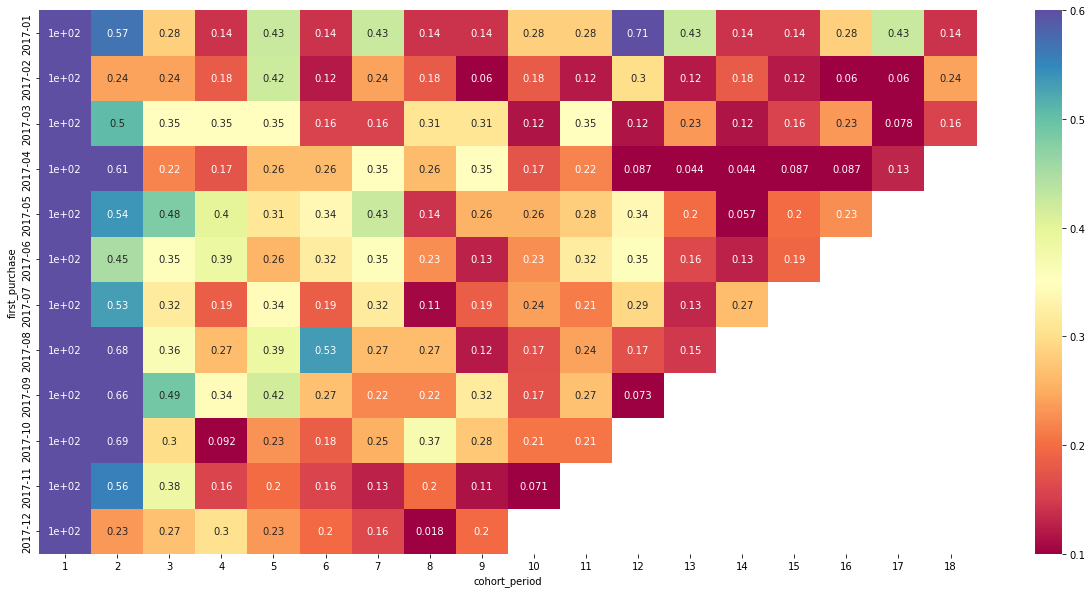

In [93]:
plt.figure(figsize=(21,10))
sns.heatmap(retention_id, 0.1, 0.6, annot=True, cmap="Spectral")

In [49]:
# Покажем когорту с самым высоким retention на 3й месяц
print('Period', retention_id[2].idxmax(), 'retention', round(retention_id[2].max(), 2),'%')


Period 2017-10 retention 0.69 %


#### 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. 
Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
В кластеризации можно выбрать следующие метрики: 

R - время от последней покупки пользователя до текущей даты\
F - суммарное количество покупок у пользователя за всё время\
M - сумма покупок за всё время

Подробно опишем, как мы создавали кластеры.\
Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.\
Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней,\
frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [50]:
# Создадим датасет для нашего задания. Используем order_approved_at.notna() - оплата была произведена.
payment_day_6 = orders.query('order_approved_at.notna()') \
    .merge(customers[['customer_id', 'customer_unique_id']], on = 'customer_id')[['order_id',
                                                                                  'customer_unique_id',
                                                                                  'order_approved_at']] \
    .merge(order_items[['order_id', 'price']], on = 'order_id')

In [51]:
# Проверим на пропуски
payment_day_6.isnull().sum()

order_id              0
customer_unique_id    0
order_approved_at     0
price                 0
dtype: int64

In [52]:
payment_day_6.head()

,order_id,customer_unique_id,order_approved_at,price
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-26 03:24:27,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:55:23,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 22:20:29,19.90


In [53]:
# импортируем timedelta
from datetime import timedelta

In [54]:
# Смоделируем анализ, который я делаю в режиме реального времени, установив дату через один день после последней покупки. 
today = payment_day_6['order_approved_at'].max() + timedelta(days=1)
today

Timestamp('2018-09-04 17:40:06')

In [55]:
# R - время от последней покупки пользователя до текущей даты
r = today - payment_day_6.groupby('customer_unique_id').order_approved_at.max()

In [56]:
# Переведем нашу серию в дни
r = r.dt.days

In [57]:
# F - суммарное количество покупок у пользователя за всё время
f = payment_day_6.groupby('customer_unique_id').order_id.count()

In [58]:
# M - сумма покупок за всё время
m = payment_day_6.groupby('customer_unique_id').price.sum()

In [59]:
# Соединим данные в один датафрейм
RFM_analisys = pd.concat([r, f, m], axis = 1)

In [60]:
# Переименуем колонки для читабельности нашего датасета
RFM_analisys = RFM_analisys.rename(columns={'order_approved_at': 'R', 'order_id': 'F', 'price': 'M'})
RFM_analisys.head()

,R,F,M
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
0000f46a3911fa3c0805444483337064,542,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [61]:
# Либо использовать lambda функцию согласно статьи про RFM - сегментацию. Получится такой же датасет
RFM = payment_day_6 \
    .groupby('customer_unique_id') \
    .agg({'order_approved_at': lambda x: (today - x.max()).days, 'order_id': lambda x: len(x), 'price': lambda x: x.sum()}) \
    .rename(columns={'order_approved_at': 'R', 'order_id': 'F', 'price': 'M'})

In [62]:
# Далее найдем квантили, чтобы разбить наши измерения на 5 диапозонов. 
quintiles = RFM_analisys.quantile(q=[0.20, 0.40, 0.60, 0.80]).to_dict()

In [63]:
quintiles

{'R': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'F': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'M': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [64]:
# Напишем методы для присвоения рангов от 1 до 5
def r_score(x):
    if x <= quintiles['R'][0.2]:
        return 5
    elif x <= quintiles['R'][0.4]:
        return 4
    elif x <= quintiles['R'][0.6]:
        return 3
    elif x <= quintiles['R'][0.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][0.2]:
        return 1
    elif x <= quintiles[c][0.4]:
        return 2
    elif x <= quintiles[c][0.6]:
        return 3
    elif x <= quintiles[c][0.8]:
        return 4
    else:
        return 5   

In [65]:
# Теперь получим оценки R, F, M для каждого клиента
RFM_analisys['R_seg'] = RFM_analisys['R'].apply(lambda x: r_score(x))
RFM_analisys['F_seg'] = RFM_analisys['F'].apply(lambda x: fm_score(x, 'F'))
RFM_analisys['M_seg'] = RFM_analisys['M'].apply(lambda x: fm_score(x, 'M'))

In [66]:
RFM_analisys.head()

,R,F,M,R_seg,F_seg,M_seg
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1
0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1
0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5


In [67]:
# Объединим оценки R, F, M для каждого клиента

In [68]:
RFM_analisys['RFM_Score'] = RFM_analisys['R_seg'].map(str) + RFM_analisys['F_seg'].map(str) + RFM_analisys['M_seg'].map(str)
RFM_analisys.head()

,R,F,M,R_seg,F_seg,M_seg,RFM_Score
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4,414
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215


**Клиенты по RFM_Score:**
    
555 — пользователи с максимальной активностью и лояльные: совершали покупку недавно, покупают товары часто и много;\
111 — Отток пользователей: совершали покупку давно, покупают товары редко и платят мало;\
R=1, 2, F=4, 5, M=4, 5 — Лояльные польователи, потерявшие активность: покупали давно, но часто и много платили.